https://stackoverflow.com/questions/77878617/desired-error-not-necessarily-achieved-due-to-precision-loss-novice

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize

In [12]:
p = [0.5]
law = stats.loglaplace(c=p[0])

In [13]:
def likelihood(params, data):
    return - stats.loglaplace.logpdf(data, c=params[0]).sum() / data.size

In [14]:
def loss_factory(data):
    @np.vectorize
    def wrapped(params):
        return likelihood([params], data)
    return wrapped

In [17]:
p0 = [1.]
plin = np.linspace(max(p[0] - 1., 0.), p[0] + 1., 200)

[0.6852830071553717]
[1.0631416939743779]
[0.9797903570186401]
[1.0088161728882032]


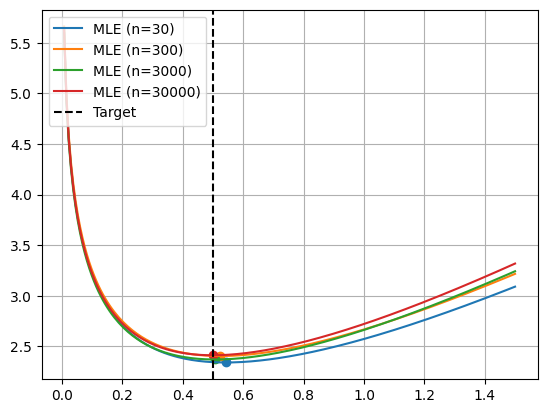

In [20]:
fig, axe = plt.subplots()

for n in [30, 300, 3000, 30000]:

    np.random.seed(123456)
    data = law.rvs(n)

    p0 = [np.median(data)]
    result = optimize.minimize(
        likelihood, p0, args=(data,),
        bounds=[(1e-8, np.inf)],
        method="Powell",
    )
    print(p0)
    
    loss = loss_factory(data)(plin)
    axe.plot(plin, loss, label="MLE (n=%d)" % n)
    axe.scatter(result.x, result.fun)
    
axe.axvline(p, linestyle="--", color="black", label="Target")
axe.legend(loc="upper left")
axe.grid()